In [47]:
#Factors that Impact MLB Attendance, by Garrett Schreffler (Group 21) 
import pandas as pd
import numpy as np                  
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn import linear_model

In [48]:
#All data being used is from baseball-reference.com
#Read the data that is useful from each year between 2015 and 2019
#Only include the columns that are of relevance to solving my questions

att_2019 = pd.read_excel('2019 Total Attendance.xlsx', index=0, usecols=[0,1,2,10])
att_2019 = att_2019.set_index(['Tm'])
record_2019 = pd.read_excel('2019 Team Records.xlsx', index=0, usecols=[1,2,3,4,5,6])
record_2019 = record_2019.set_index(['Tm'])

att_2018 = pd.read_excel('2018 Total Attendance.xlsx', index=0, usecols=[0,1,2,10])
record_2018 = pd.read_excel('2018 Team Records.xlsx', index=0, usecols=[1,2,3,4,5,6])

att_2017 = pd.read_excel('2017 Total Attendance.xlsx', index=0, usecols=[0,1,2,10])
record_2017 = pd.read_excel('2017 Team Records.xlsx', index=0, usecols=[1,2,3,4,5,6])

att_2016 = pd.read_excel('2016 Total Attendance.xlsx', index=0, usecols=[0,1,2,10])
record_2016 = pd.read_excel('2016 Team Records.xlsx', index=0, usecols=[1,2,3,4,5,6])

att_2015 = pd.read_excel('2015 Total Attendance.xlsx', index=0, usecols=[0,1,2,10])
record_2015 = pd.read_excel('2015 Team Records.xlsx', index=0, usecols=[1,2,3,4,5,6])

att_2019.head() 

,Attendance,Attend/G,Est. Payroll
Tm,,,
LAD,3974309,49066,193553333
STL,3480393,42968,161120267
NYY,3304404,40795,228442421
CHC,3094865,38208,217805215
LAA,3019012,37272,177345250


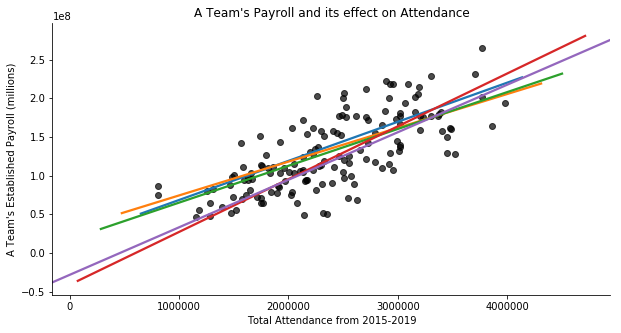

In [49]:
#Plot tthe relationship between a team's payroll and their attendance between 2015 and 2019


my_fig, my_ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='Attendance',y='Est. Payroll',data=att_2019,scatter_kws = {'alpha':0.7, 'color':'black'},ax = my_ax, ci=0)  
sns.regplot(x='Attendance',y='Est. Payroll',data=att_2018,scatter_kws = {'alpha':0.7, 'color':'black'},ax = my_ax, ci=0)  
sns.regplot(x='Attendance',y='Est. Payroll',data=att_2017,scatter_kws = {'alpha':0.7, 'color':'black'},ax = my_ax, ci=0)  
sns.regplot(x='Attendance',y='Est. Payroll',data=att_2016,scatter_kws = {'alpha':0.7, 'color':'black'},ax = my_ax, ci=0)  
sns.regplot(x='Attendance',y='Est. Payroll',data=att_2015,scatter_kws = {'alpha':0.7, 'color':'black'},ax = my_ax, ci=0)  

sns.despine(ax = my_ax) 

my_ax.set_title('A Team\'s Payroll and its effect on Attendance')
my_ax.set_ylabel('A Team\'s Established Payroll (millions)')
my_ax.set_xlabel('Total Attendance from 2015-2019')

plt.savefig('att_2019.pdf', bbox_inches='tight')

plt.show()

In [50]:
#Read in the data that contains the total yearly number of homeruns hit per team 
#merge this data with the data containing the total attendance each year per team 

HR_2019 = pd.read_excel('2019 Homeruns.xlsx', index=0, usecols=[0,11])

merge_2019_HR=pd.merge(left=att_2019, right=HR_2019, left_on='Tm', right_on='Tm', how='inner')

merge_2019_HR.head()

,Tm,Attendance,Attend/G,Est. Payroll,HR
0,LAD,3974309,49066,193553333,279
1,STL,3480393,42968,161120267,210
2,NYY,3304404,40795,228442421,306
3,CHC,3094865,38208,217805215,256
4,LAA,3019012,37272,177345250,220


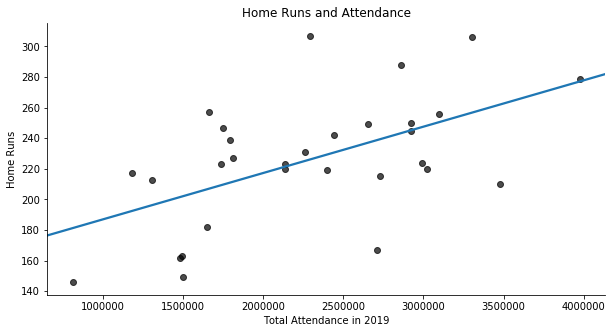

In [51]:
#Plot the relationship between home runs and attendance 

my_fig, my_ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='Attendance',y='HR',data=merge_2019_HR,scatter_kws = {'alpha':0.7, 'color':'black'},ax = my_ax, ci=0)  

sns.despine(ax = my_ax) 

my_ax.set_title('Home Runs and Attendance')
my_ax.set_ylabel('Home Runs')
my_ax.set_xlabel('Total Attendance in 2019')


plt.show()

In [52]:
#Run an OLS regression with the total number of home runs hit on total attendance

y = merge_2019_HR['Attendance']
x = merge_2019_HR['HR']

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     401.1
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.58e-18
Time:                        17:12:28   Log-Likelihood:                -442.88
No. Observations:                  30   AIC:                             887.8
Df Residuals:                      29   BIC:                             889.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HR          1.011e+04    504.722     20.029      0.000    9076.660    1.11e+04
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   0.547
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.989
Skew:                           0.307   Prob(JB):                        0.610
Kurtosis:                       2.357   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Create a table showing the highest total attendances and sort it by year

Total_att = pd.read_excel('League Total Attendance Per Year.xlsx', usecols=[0,16,17,18,20])
Total_att = Total_att.set_index(['Year'])

Total_att.head(21)

,Attendance,Attend/G,Lg Payroll*
Year,,,
2007,79484718.0,32696.0,2.499199e+09
2008,78624315.0,32382.0,2.694090e+09
2006,76043902.0,31306.0,2.337875e+09
2005,74915268.0,30816.0,2.189013e+09
2012,74859268.0,30806.0,2.950093e+09
2013,74027037.0,30451.0,3.150728e+09
2014,73739622.0,30345.0,3.398869e+09
2015,73719340.0,30349.0,3.680887e+09
2009,73430580.0,30218.0,2.791645e+09


In [54]:
#Merge the data containing total yearly attendance and the team's record for each year (2015-2019)

merged_2019=pd.merge(left=att_2019, right=record_2019, left_on='Tm', right_on='Tm', how='inner')
merged_2018=pd.merge(left=att_2018, right=record_2018, left_on='Tm', right_on='Tm', how='inner')
merged_2017=pd.merge(left=att_2017, right=record_2017, left_on='Tm', right_on='Tm', how='inner')
merged_2016=pd.merge(left=att_2016, right=record_2016, left_on='Tm', right_on='Tm', how='inner')
merged_2015=pd.merge(left=att_2015, right=record_2015, left_on='Tm', right_on='Tm', how='inner')

merged_2015

,Tm,Attendance,Attend/G,Est. Payroll,Lg,G,W,L,W-L%
0,LAD,3764815,46479,265140429,NL,162.0,92,70,0.568
1,STL,3520889,43468,128241500,NL,162.0,100,62,0.617
2,SFG,3375882,41678,180018166,NL,162.0,84,78,0.518
3,NYY,3193795,39430,214051957,AL,162.0,87,75,0.537
4,LAA,3012765,37195,131522500,AL,162.0,85,77,0.525
5,CHC,2919122,36039,115306610,NL,162.0,97,65,0.599
6,BOS,2880694,35564,183931900,AL,162.0,78,84,0.481
7,TOR,2794891,34505,117917400,AL,162.0,93,69,0.574
8,DET,2726048,33655,172284750,AL,161.0,74,87,0.460
9,KCR,2708549,33439,121590475,AL,162.0,95,67,0.586


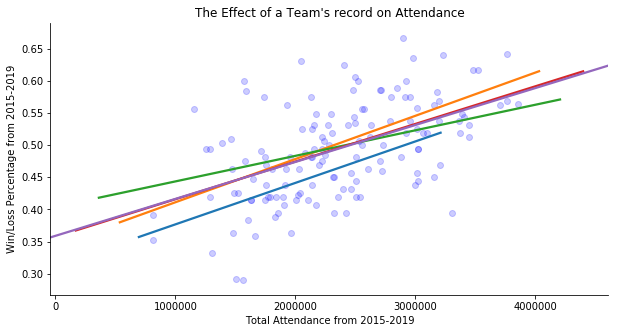

In [55]:
#Plot attendance and winning percentage data from each year between 2015 and 2019

my_fig, my_ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='Attendance',y='W-L%',data=merged_2019,scatter_kws = {'alpha':0.2, 'color':'blue'},ax = my_ax, ci=0)  
sns.regplot(x='Attendance',y='W-L%',data=merged_2018,scatter_kws = {'alpha':0.2, 'color':'blue'},ax = my_ax, ci = 0)
sns.regplot(x='Attendance',y='W-L%',data=merged_2017,scatter_kws = {'alpha':0.2, 'color':'blue'},ax = my_ax, ci = 0)
sns.regplot(x='Attendance',y='W-L%',data=merged_2016,scatter_kws = {'alpha':0.2, 'color':'blue'},ax = my_ax, ci = 0)
sns.regplot(x='Attendance',y='W-L%',data=merged_2015,scatter_kws = {'alpha':0.2, 'color':'blue'},ax = my_ax,ci = 0)

sns.despine(ax = my_ax) 

my_ax.set_title('The Effect of a Team\'s record on Attendance')
my_ax.set_ylabel('Win/Loss Percentage from 2015-2019')
my_ax.set_xlabel('Total Attendance from 2015-2019')

plt.show()

In [56]:
#Drop the largest markets in the MLB to more accuratley see effects of Win/loss percentage on attendance

small_mkt_2019=merged_2019.drop(['LAA','CHC','BOS','NYM','PHI'])
small_mkt_2019

,Attendance,Attend/G,Est. Payroll,Lg,G,W,L,W-L%
Tm,,,,,,,,
COL,2993244,36954,145348500,NL,162.0,71,91,0.438
SFG,2707760,33429,175550753,NL,162.0,77,85,0.475
SDP,2396399,29585,90260767,NL,162.0,70,92,0.432
ARI,2135510,26364,124016266,NL,162.0,85,77,0.525
TEX,2132994,26333,104433499,AL,162.0,78,84,0.481
CIN,1808685,22329,109737499,NL,162.0,75,87,0.463
SEA,1791720,22120,126874600,AL,162.0,68,94,0.420
TOR,1750144,21607,64680671,AL,162.0,67,95,0.414
CLE,1738642,21465,151257783,AL,162.0,93,69,0.574


In [57]:
#Run an OLS regression with the win/loss percentage on total attendance for small market teams

y = small_mkt_2019['Attendance']
x = small_mkt_2019['W-L%']

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     220.2
Date:                Fri, 01 May 2020   Prob (F-statistic):           5.87e-10
Time:                        17:12:29   Log-Likelihood:                -217.20
No. Observations:                  15   AIC:                             436.4
Df Residuals:                      14   BIC:                             437.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W-L%        4.288e+06   2.89e+05     14.838      0.000    3.67e+06    4.91e+06
==============================================================================
Omnibus:                        2.466   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.086
Skew:                           0.652   Prob(JB):                        0.581
Kurtosis:                       3.196   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""